In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

""" 
DSC672
Team: John Matune, Mike Yacobucci, Steve Rummel
Project: Energy Consumption and Renewable Energy
Purpose: 

Import solar and wind data from the relevant source files, 
convert string-format date and time into valid datetime values,
remove unneeded columns, normalize column headers, and
export to canonical data source for further analysis.
"""

solar_prod = pd.read_csv('./raw/solararray_production.csv')
wind_prod = pd.read_csv('./raw/windfarm_production.csv')

solar_prod.rename(index=str, columns={"Electricity_KW_HR": "KWH"}, inplace=True)
solar_prod['Source'] = 'Solar'
wind_prod.rename(index=str, columns={"Electricity_KW_HR": "KWH"}, inplace=True)
wind_prod['Source'] = 'Wind'

power_production = pd.concat([solar_prod, wind_prod], ignore_index=True, sort=False)

In [16]:
print(power_production.head())

         Date  Hour       KWH Source
0  01/04/2010    16  14186.16  Solar
1  01/04/2010    17   5898.00  Solar
2  01/05/2010    10  12421.86  Solar
3  01/05/2010    11  14210.46  Solar
4  01/05/2010    12  14723.64  Solar


In [17]:
power_production['Date'] = pd.to_datetime(power_production['Date'])
power_production['Time'] =  power_production['Date'] + pd.to_timedelta(power_production['Hour'], unit='h')
#power_production.drop(['Hour'], axis=1, inplace=True)


In [18]:
power_production.set_index('Date', inplace=True)

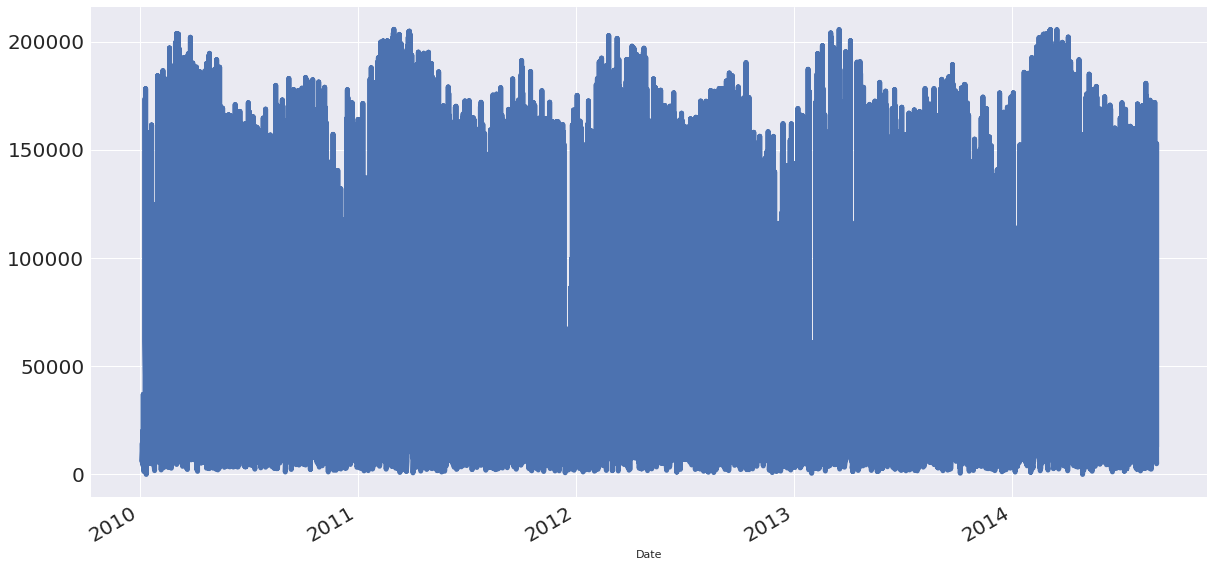

In [21]:
power_production['KWH'].loc[power_production['Source'] == 'Solar'].plot(figsize=(20,10), linewidth=5, fontsize=20);

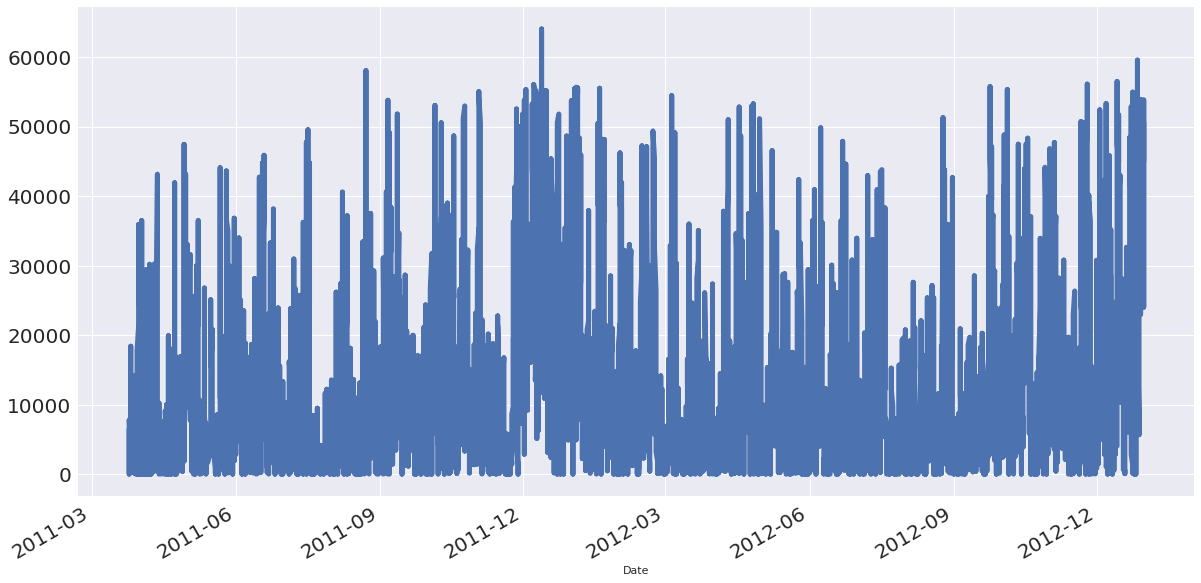

In [22]:
power_production['KWH'].loc[power_production['Source'] == 'Wind'].plot(figsize=(20,10), linewidth=5, fontsize=20);

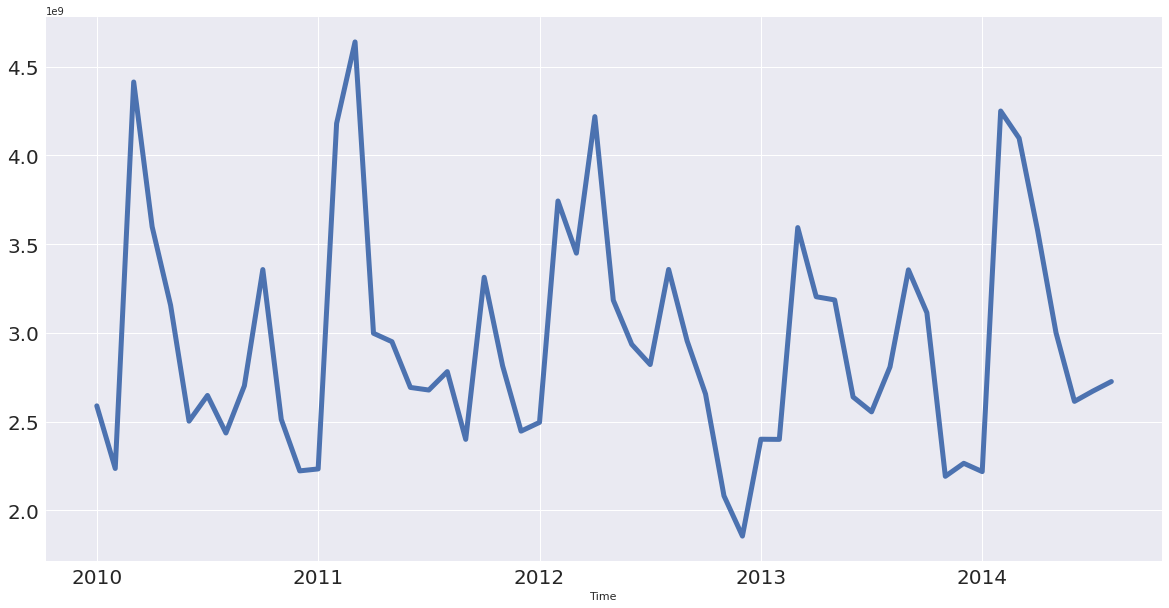

In [44]:
# Solar and Wind only overlap for ~2 years (2011-2012), so may need to exclude some data where we do not have data, 
# assuming our analysis will require both solar and wind to be available to replace nonrenewable sources.
# Hypothesis: Solar power varies sufficiently little over the course of years that we can safely exclude most of it 
# and consider 2012 as representative. Alternatively, use an average of the years we do have.
# Note: Solar readings were not taken from 6 pm through 9 am, unsurprisingly.

solar = power_production.loc[power_production['Source'] == 'Solar']
#solar.reset_index(inplace=True)
solar.set_index('Time', inplace=True)
#print(solar.head())
#print(solar.info())
solvar = solar.resample('M').var()
solvar['KWH'].plot(figsize=(20,10), linewidth=5, fontsize=20);

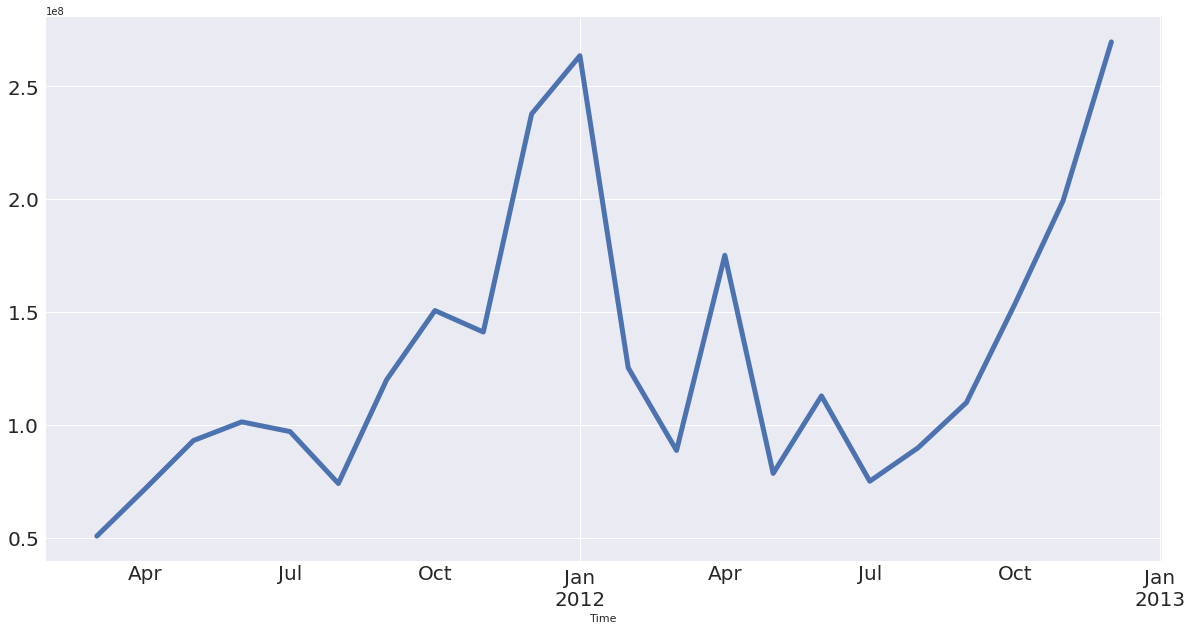

In [43]:
# Solar and Wind only overlap for ~2 years (2011-2012), so may need to exclude some data where we do not have data, 
# assuming our analysis will require both solar and wind to be available to replace nonrenewable sources.
# Hypothesis: Solar power varies sufficiently little over the course of years that we can safely exclude most of it 
# and consider 2012 as representative. Alternatively, use an average of the years we do have.
# Note: Solar readings were not taken from 6 pm through 9 am, unsurprisingly.

wind = power_production.loc[power_production['Source'] == 'Wind']
wind.set_index('Time', inplace=True)
windvar = wind.resample('M').var()
windvar['KWH'].plot(figsize=(20,10), linewidth=5, fontsize=20);